# Cas9 nickase 300 nM sgRNA test

In [2]:
import pandas as pd

In [12]:
%load_ext rpy2.ipython

In [13]:
%%R

library(ggplot2)
library(RColorBrewer)
library(ggpubr)

In [4]:
sample_table = 'Cas9-300nM-sgRNA/sampleTable.csv'
samples = pd.read_csv(sample_table)
samples

,Nuclease free H20,10X NEBuffer r3.1 Reaction Buffer,sgRNA species,Diluted sgRNA volume (ul),EnGen Spy Cas9 Nickase (1uM),Template DNA (ul),Template DNA mass (ng),Sample Number,sgRNA concentration (nM),Cas9 Concentration (nM),Lane,sgRNA_ID
0,26.347423,3,NaN,0.000000,0.0,0.652577,195.772972,1,NaN,NaN,1,NaN
1,14.776679,3,pFC9VR13Cas9-0,10.670745,0.9,0.652577,195.772972,2,300.0,30.0,2,0.0
2,18.691915,3,pFC9VR13Cas9-1,6.755509,0.9,0.652577,195.772972,3,300.0,30.0,3,1.0
3,21.840040,3,pFC9VR13Cas9-2,3.607383,0.9,0.652577,195.772972,4,300.0,30.0,4,2.0
4,19.032803,3,pFC9VR13Cas9-3,6.414621,0.9,0.652577,195.772972,5,300.0,30.0,5,3.0
5,18.679405,3,pFC9VR13Cas9-4,6.768019,0.9,0.652577,195.772972,6,300.0,30.0,6,4.0


In [6]:
quant_table = 'Cas9-300nM-sgRNA/2022-01-26_10h26m35s-sgRNA-test-300nM-pFC9.csv'
quant = pd.read_csv(quant_table, skiprows=1)
quant[0:3]

,Lane,Band No.,Band Label,Mol. Wt. (KDa),Relative Front,Adj. Volume (Int),Volume (Int),Abs. Quant.,Rel. Quant.,Band %,Lane %
0,1,1,NaN,NaN,0.753769,3790122,5663740,NaN,NaN,100.000000,74.531968
1,2,1,NaN,NaN,0.567839,2136920,3660562,NaN,NaN,46.151666,29.492316
2,2,2,NaN,NaN,0.778894,2493292,4225788,NaN,NaN,53.848334,34.410720


Ignore lane 1, this is pFC9 loading control.

In [7]:
lanes = quant[1:]

Only two bands per lane, top is nicked (band 1) and bottom is supercoiled (band 2). Remove second band from table.

In [9]:
lanes_nicked = lanes.loc[lanes['Band No.'] == 1]
lanes_nicked

,Lane,Band No.,Band Label,Mol. Wt. (KDa),Relative Front,Adj. Volume (Int),Volume (Int),Abs. Quant.,Rel. Quant.,Band %,Lane %
1,2,1,NaN,NaN,0.567839,2136920,3660562,NaN,NaN,46.151666,29.492316
3,3,1,NaN,NaN,0.547739,460840,1296420,NaN,NaN,13.097791,9.033917
5,4,1,NaN,NaN,0.567839,3155770,4789456,NaN,NaN,91.845258,64.650249
7,5,1,NaN,NaN,0.577889,2331916,3403902,NaN,NaN,60.158233,35.865357
9,6,1,NaN,NaN,0.587940,2793494,4161254,NaN,NaN,97.666351,67.702061


In [15]:
lanes_nicked_label = pd.merge(lanes_nicked, samples, on='Lane')
lanes_nicked_label['nicked_percent'] = lanes_nicked_label['Band %']  # make easier for R
lanes_nicked_label

,Lane,Band No.,Band Label,Mol. Wt. (KDa),Relative Front,Adj. Volume (Int),Volume (Int),Abs. Quant.,Rel. Quant.,Band %,...,sgRNA species,Diluted sgRNA volume (ul),EnGen Spy Cas9 Nickase (1uM),Template DNA (ul),Template DNA mass (ng),Sample Number,sgRNA concentration (nM),Cas9 Concentration (nM),sgRNA_ID,nicked_percent
0,2,1,NaN,NaN,0.567839,2136920,3660562,NaN,NaN,46.151666,...,pFC9VR13Cas9-0,10.670745,0.9,0.652577,195.772972,2,300.0,30.0,0.0,46.151666
1,3,1,NaN,NaN,0.547739,460840,1296420,NaN,NaN,13.097791,...,pFC9VR13Cas9-1,6.755509,0.9,0.652577,195.772972,3,300.0,30.0,1.0,13.097791
2,4,1,NaN,NaN,0.567839,3155770,4789456,NaN,NaN,91.845258,...,pFC9VR13Cas9-2,3.607383,0.9,0.652577,195.772972,4,300.0,30.0,2.0,91.845258
3,5,1,NaN,NaN,0.577889,2331916,3403902,NaN,NaN,60.158233,...,pFC9VR13Cas9-3,6.414621,0.9,0.652577,195.772972,5,300.0,30.0,3.0,60.158233
4,6,1,NaN,NaN,0.587940,2793494,4161254,NaN,NaN,97.666351,...,pFC9VR13Cas9-4,6.768019,0.9,0.652577,195.772972,6,300.0,30.0,4.0,97.666351


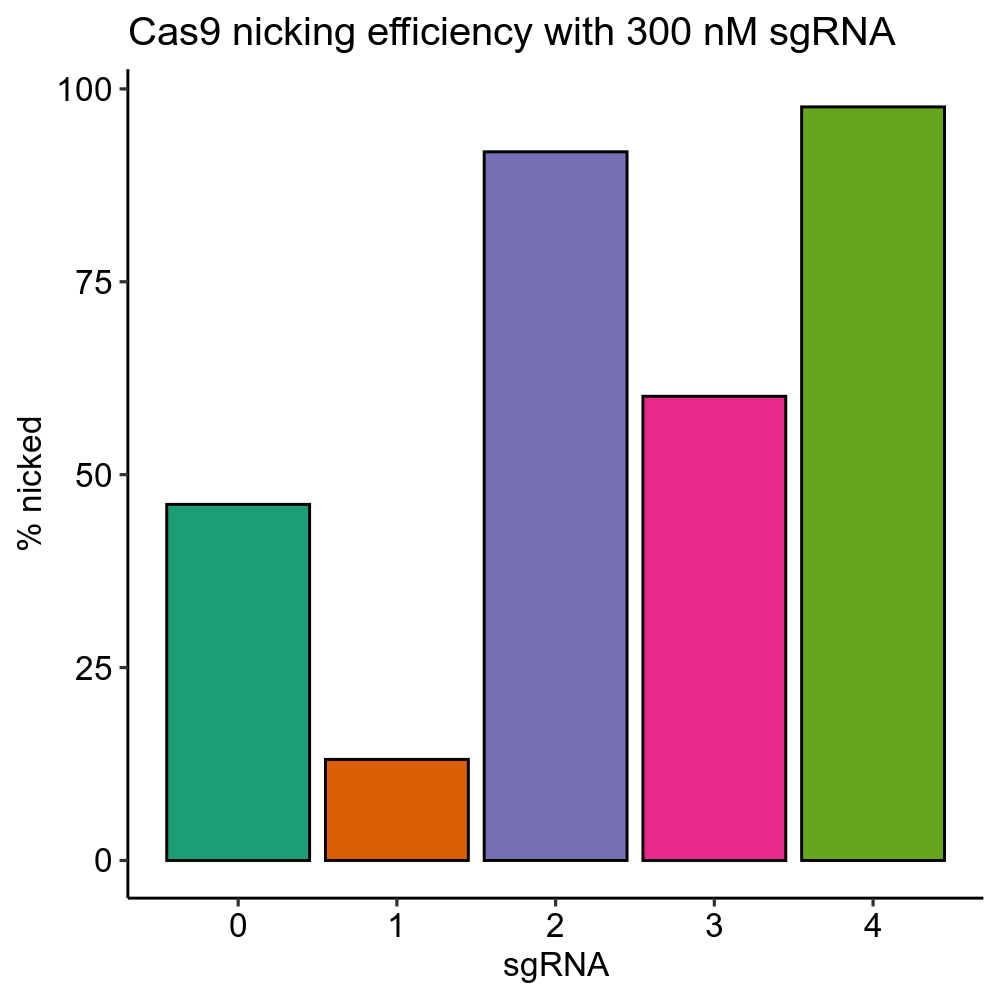

In [25]:
%%R -i lanes_nicked_label -w 5 -h 5 --units in -r 200

nicked_quant <- ggplot(lanes_nicked_label, aes(x=sgRNA_ID, y=nicked_percent, fill=as.factor(sgRNA_ID))) + geom_bar(stat='identity', color='black') +
        theme_pubr() + labs(x='sgRNA', y='% nicked', title='Cas9 nicking efficiency with 300 nM sgRNA') + scale_fill_brewer(palette = "Dark2") +
        theme(legend.position = "none") 
nicked_quant

## Comparison to 30 nM sgRNA

![](https://ethlabnotes.com/images/gels/2022-01-23_12h57m51s-Cas9nickase-sgRNA0-4-test-pFC9.png/2022-01-23_12h57m51s-Cas9nickase-sgRNA0-4-test-pFC9.crop.label.png)

In [27]:
st2 = 'Cas9-300nM-sgRNA/2022-01-23_12h57m51s-Cas9nickase-sgRNA0-4-test-pFC9.csv'
st2 = pd.read_csv(st2, skiprows=1)

Do the same thing, ignore first lanes as is pFC9 and take only top band from each lane.

In [29]:
st2_lanes = st2[1:]
st2_nicked = st2_lanes.loc[st2_lanes['Band No.'] == 1]

sgRNAs are in the same lanes as 300 nm gel so can merge on the same labels.

In [31]:
st2_label = pd.merge(st2_nicked, samples, on='Lane')
st2_label

,Lane,Band No.,Band Label,Mol. Wt. (KDa),Relative Front,Adj. Volume (Int),Volume (Int),Abs. Quant.,Rel. Quant.,Band %,...,10X NEBuffer r3.1 Reaction Buffer,sgRNA species,Diluted sgRNA volume (ul),EnGen Spy Cas9 Nickase (1uM),Template DNA (ul),Template DNA mass (ng),Sample Number,sgRNA concentration (nM),Cas9 Concentration (nM),sgRNA_ID
0,2,1,NaN,NaN,0.180328,359924,1740449,NaN,NaN,9.332623,...,3,pFC9VR13Cas9-0,10.670745,0.9,0.652577,195.772972,2,300.0,30.0,0.0
1,3,1,NaN,NaN,0.176230,364190,1949088,NaN,NaN,9.603967,...,3,pFC9VR13Cas9-1,6.755509,0.9,0.652577,195.772972,3,300.0,30.0,1.0
2,4,1,NaN,NaN,0.180328,1283908,3391865,NaN,NaN,27.353822,...,3,pFC9VR13Cas9-2,3.607383,0.9,0.652577,195.772972,4,300.0,30.0,2.0
3,5,1,NaN,NaN,0.184426,646220,2373397,NaN,NaN,16.098243,...,3,pFC9VR13Cas9-3,6.414621,0.9,0.652577,195.772972,5,300.0,30.0,3.0
4,6,1,NaN,NaN,0.186475,2923316,4776972,NaN,NaN,53.229379,...,3,pFC9VR13Cas9-4,6.768019,0.9,0.652577,195.772972,6,300.0,30.0,4.0


Calculate difference in nicked top band percentage between the two sgRNA concentrations.

In [38]:
st2_label['sgRNA_ID']

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: sgRNA_ID, dtype: float64

In [39]:
lanes_nicked_label['sgRNA_ID']

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: sgRNA_ID, dtype: float64

In [42]:
nick_change =  pd.DataFrame(lanes_nicked_label['Band %'] - st2_label['Band %'])
nick_change['sgRNA_ID'] = lanes_nicked_label['sgRNA_ID']
nick_change['nicked_percent'] = nick_change['Band %']
nick_change

,Band %,sgRNA_ID,nicked_percent
0,36.819043,0.0,36.819043
1,3.493824,1.0,3.493824
2,64.491436,2.0,64.491436
3,44.059990,3.0,44.059990
4,44.436972,4.0,44.436972


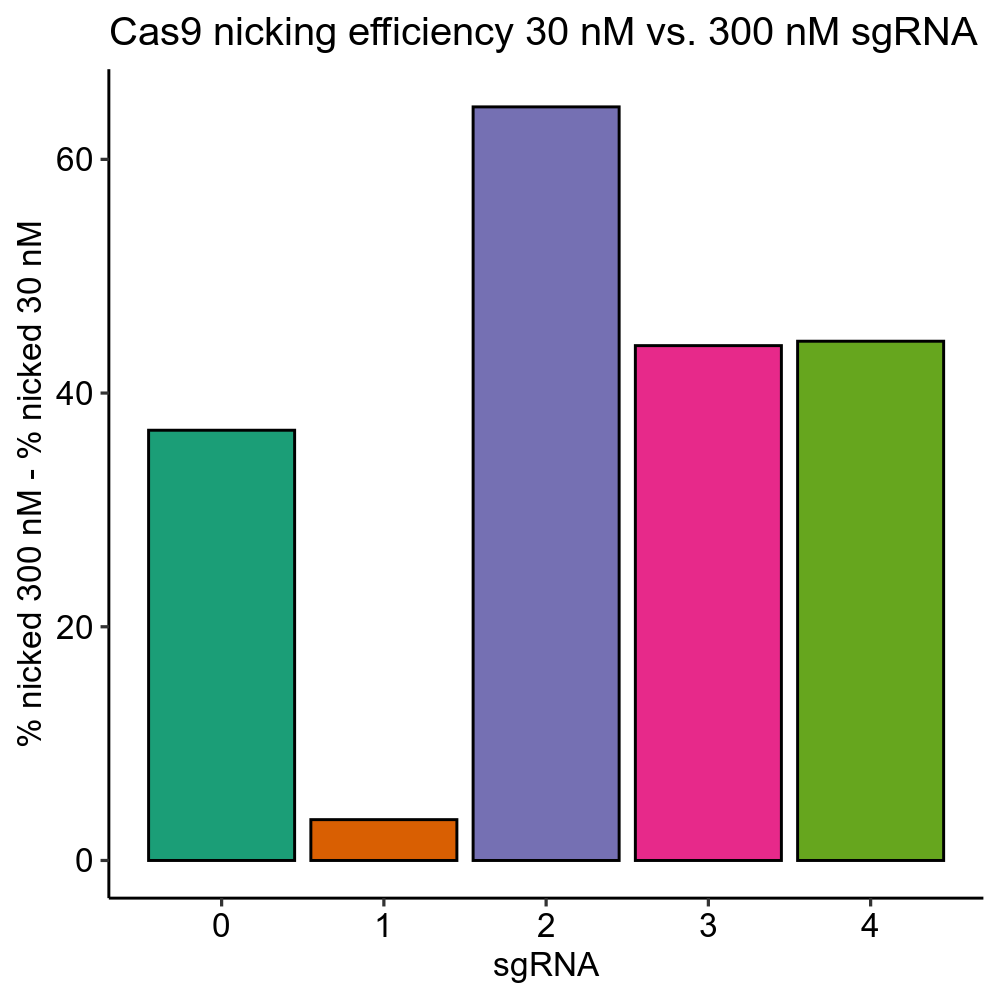

In [46]:
%%R -i nick_change -w 5 -h 5 --units in -r 200

nicked.change.30.300 <- ggplot(nick_change, aes(x=sgRNA_ID, y=nicked_percent, fill=as.factor(sgRNA_ID))) + geom_bar(stat='identity', color='black') +
        theme_pubr() + 
        labs(x='sgRNA', y='% nicked 300 nM - % nicked 30 nM', title='Cas9 nicking efficiency 30 nM vs. 300 nM sgRNA') + 
        scale_fill_brewer(palette = "Dark2") +
        theme(legend.position = "none") 
nicked.change.30.300

In [51]:
%%R 

ggsave('plots/300nM-vs-30nM-sgRNA-Cas9.png', nicked.change.30.300, dpi=800)

R[write to console]: Saving 6.67 x 6.67 in image

